In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

In [2]:
data = pd.read_csv('../data/training_data.csv')
data['increase_stock'] = data['increase_stock'].astype('category')
data['month'] = data['month'].astype('category')
data['hour_of_day'] = data['hour_of_day'].astype('category')
data['holiday'] = data['holiday'].astype('category')
data['weekday'] = data['weekday'].astype('category')
data['summertime'] = data['summertime'].astype('category')
data['day_of_week'] = data['day_of_week'].astype('category')
data = data.drop('snow', axis=1) #no information in this column
data['is_high_demand'] = data['increase_stock'].apply(lambda entity: 1 if entity == 'high_bike_demand' else 0)
data['is_high_demand'] = data['is_high_demand'].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   hour_of_day     1600 non-null   category
 1   day_of_week     1600 non-null   category
 2   month           1600 non-null   category
 3   holiday         1600 non-null   category
 4   weekday         1600 non-null   category
 5   summertime      1600 non-null   category
 6   temp            1600 non-null   float64 
 7   dew             1600 non-null   float64 
 8   humidity        1600 non-null   float64 
 9   precip          1600 non-null   float64 
 10  snowdepth       1600 non-null   float64 
 11  windspeed       1600 non-null   float64 
 12  cloudcover      1600 non-null   float64 
 13  visibility      1600 non-null   float64 
 14  increase_stock  1600 non-null   category
 15  is_high_demand  1600 non-null   int64   
dtypes: category(7), float64(8), int64(1)
memory usage: 125.5 KB


In [3]:
data.describe()

,temp,dew,humidity,precip,snowdepth,windspeed,cloudcover,visibility,is_high_demand
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,15.210313,7.750750,63.927844,0.122042,0.042713,13.082500,64.322375,15.344125,0.180000
std,9.264785,10.026459,19.079419,0.920600,0.421198,7.756652,32.748869,2.323737,0.384308
min,-9.100000,-18.400000,15.850000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,7.700000,-0.800000,47.845000,0.000000,0.000000,7.500000,28.800000,16.000000,0.000000
50%,15.500000,8.300000,65.175000,0.000000,0.000000,12.300000,79.300000,16.000000,0.000000
75%,23.200000,16.800000,79.955000,0.000000,0.000000,17.600000,92.800000,16.000000,0.000000
max,35.600000,24.300000,99.890000,25.871000,6.710000,43.800000,100.000000,16.000000,1.000000


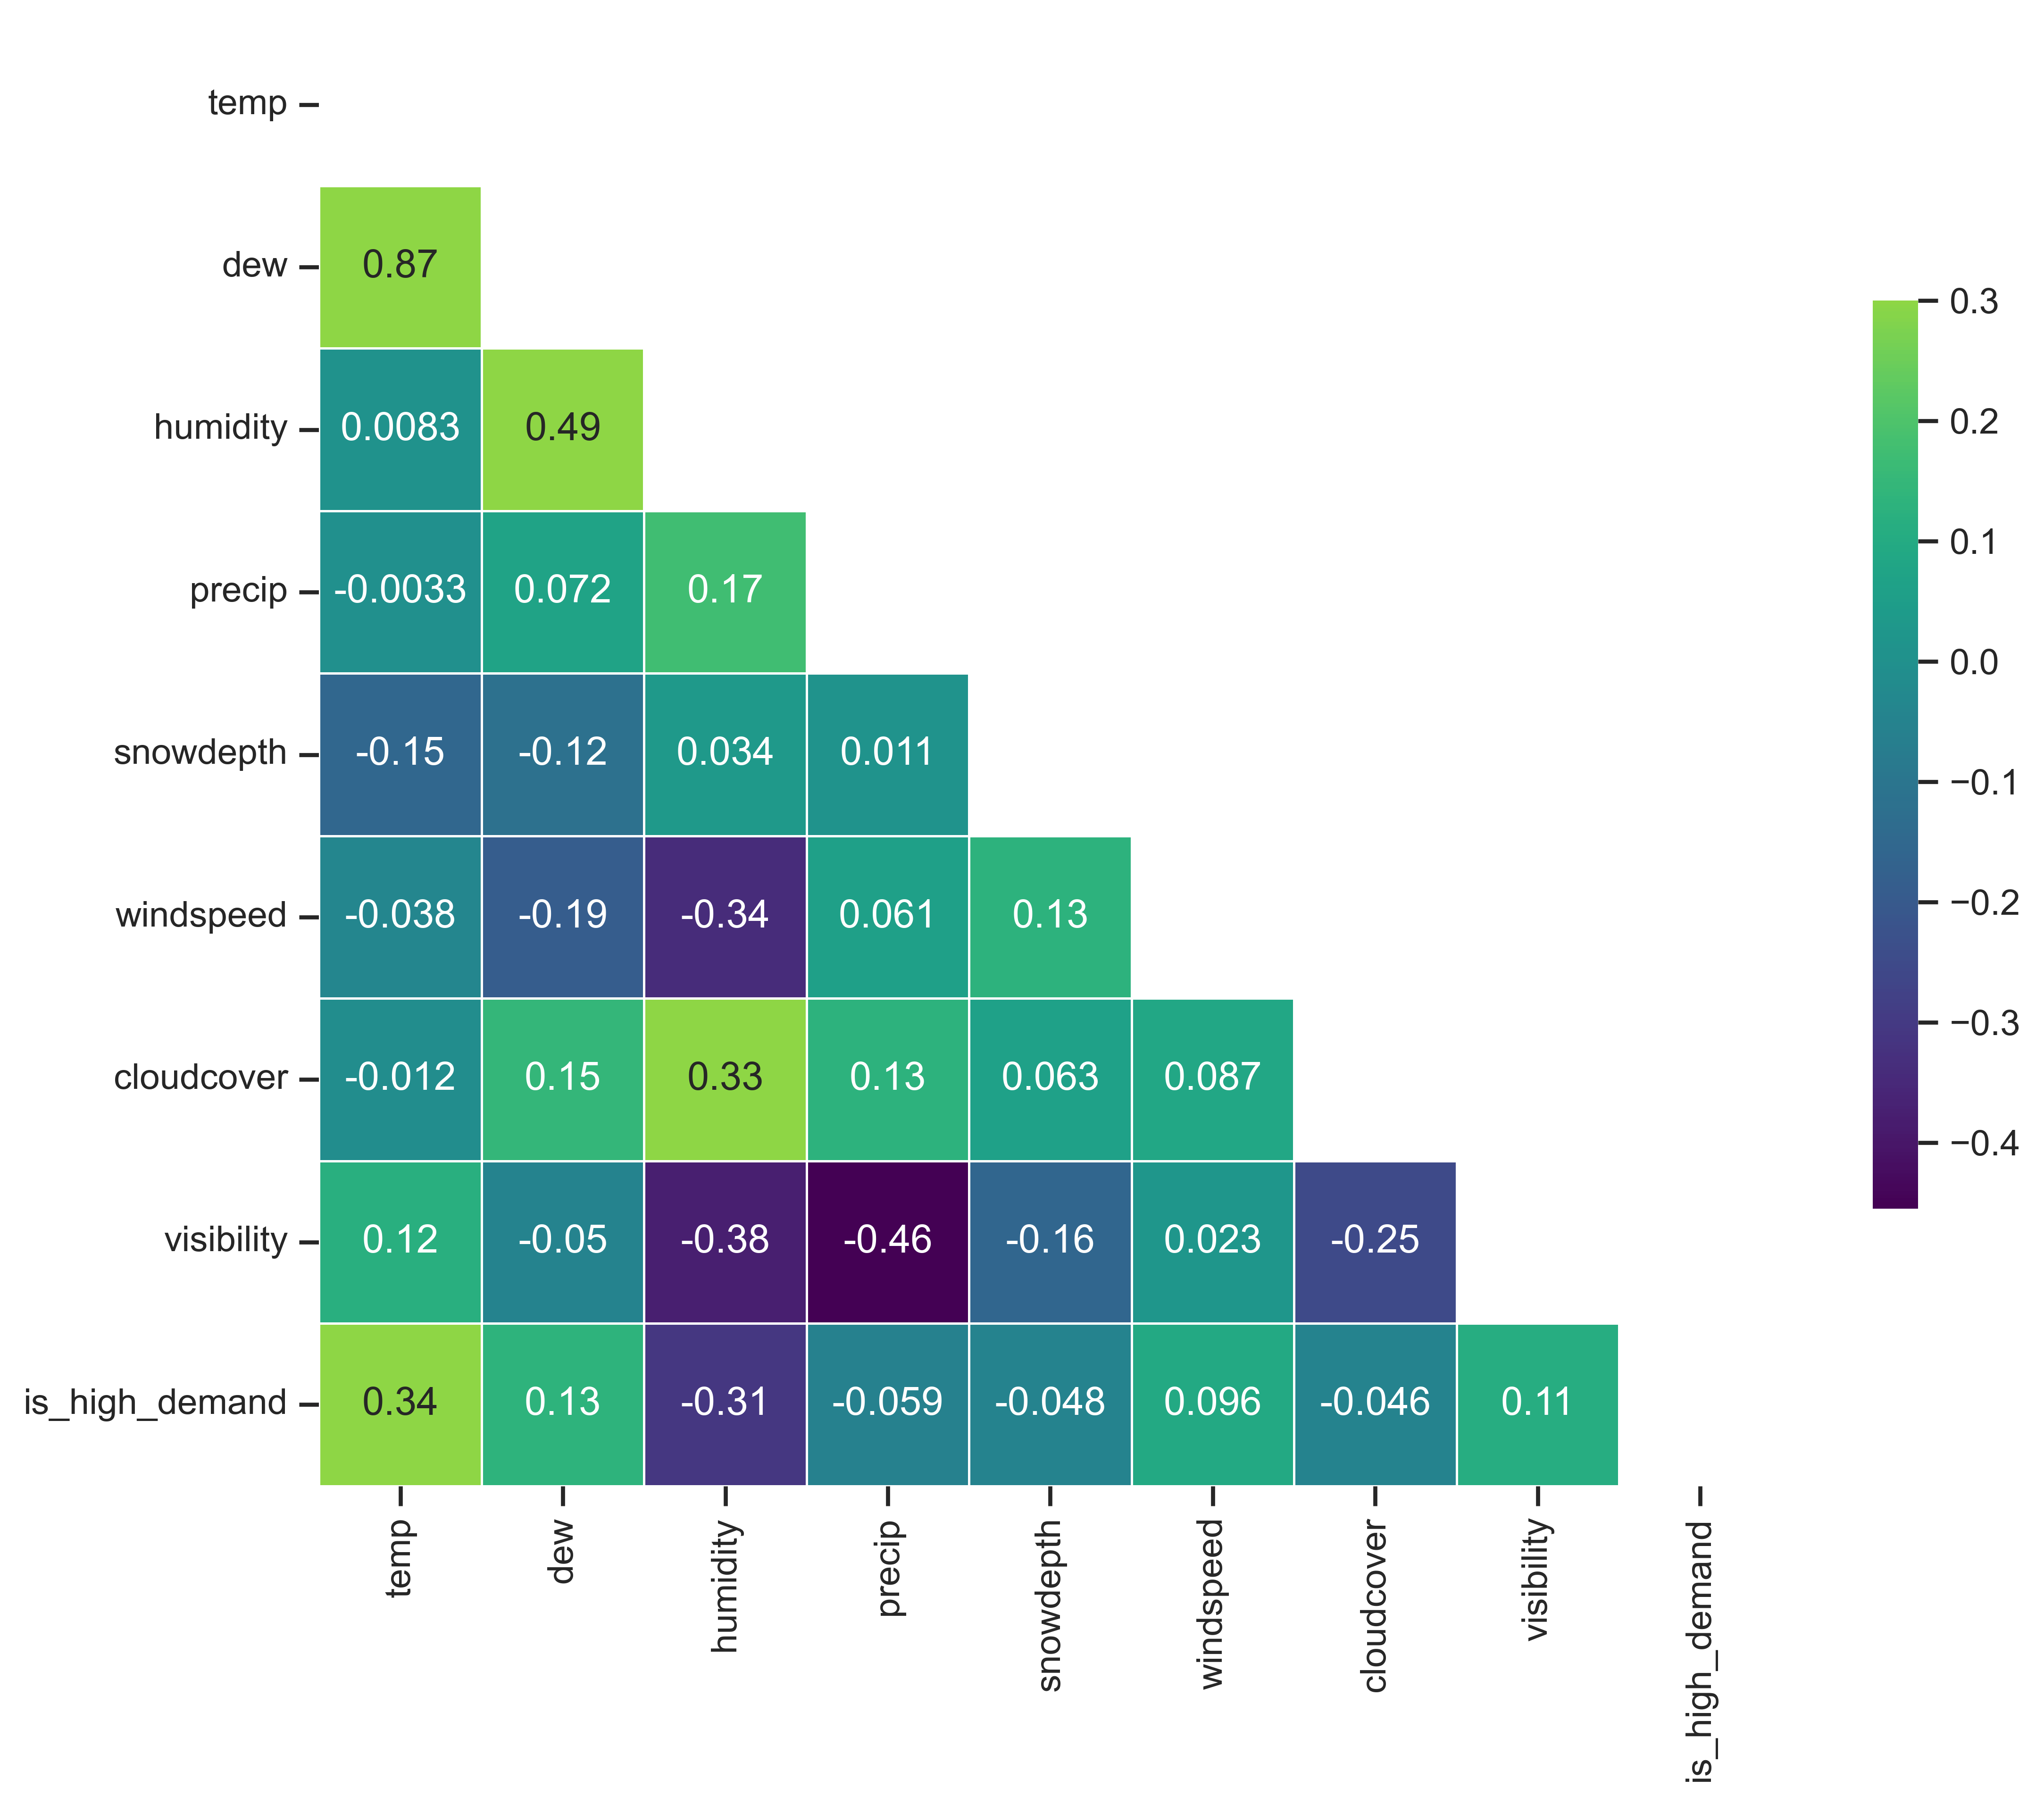

In [11]:
from matplotlib.colors import LinearSegmentedColormap

data.head()
data_numerical = data.select_dtypes(include='number')
corr_matrix = data_numerical.corr()

# Create a mask to only show the lower triangle of the matrix
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 10), dpi=500)

# Choose a color palette (e.g., "coolwarm", "viridis", "magma", etc.)
# cmap = sns.color_palette('viridis', as_cmap=True)
# Draw the heatmap with the mask and aspect ratio
sns.heatmap(corr_matrix, mask=mask, cmap='viridis', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
# plt.savefig('../figures/weather_correlation_matrix.png',format='png', dpi=500)

In [5]:
print(corr_matrix['is_high_demand'].sort_values())

humidity         -0.308726
precip           -0.059304
snowdepth        -0.047526
cloudcover       -0.045534
windspeed         0.096011
visibility        0.113443
dew               0.132663
temp              0.336981
is_high_demand    1.000000
Name: is_high_demand, dtype: float64


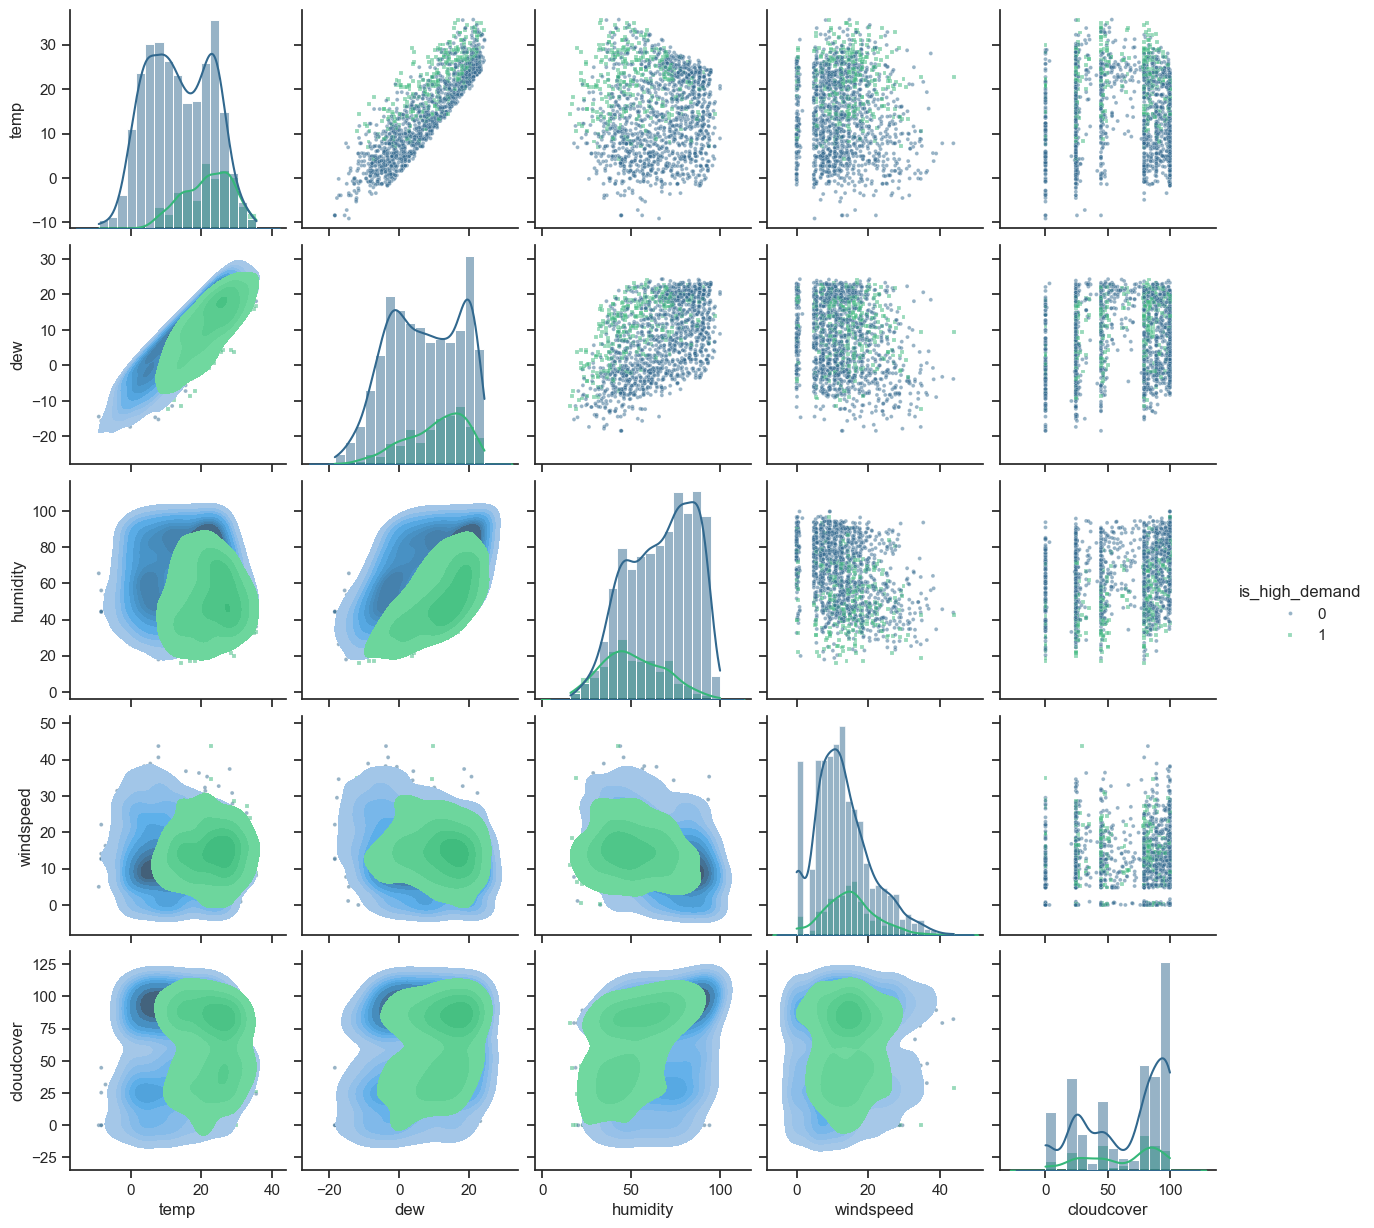

In [32]:
#show plots of all highly correlated numerical data
data_weather = data_numerical.drop(['precip','visibility','snowdepth'],axis=1)
covariates = data_weather.columns[data_weather.columns != 'is_high_demand']
# Create scatter plots for every combination of covariates
sns.set(style="ticks")
pp = sns.pairplot(data_numerical, 
             vars=covariates, 
             hue='is_high_demand',
             markers=["o", "s"],
             plot_kws={"s":8,'alpha':.5},
             palette='viridis')
pp.map_lower(sns.kdeplot, fill=True)
pp.map_diag(sns.histplot, kde=True)
# plt.savefig('../figures/pair_plot_weather.png',format='png', dpi=800, bbox_inches='tight')

/var/folders/wg/5g_37w5920gg12w48ly3r9qh0000gn/T/ipykernel_43667/2503753601.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_violin,x='is_high_demand',y='temp',palette='viridis')


<Axes: xlabel='is_high_demand', ylabel='temp'>

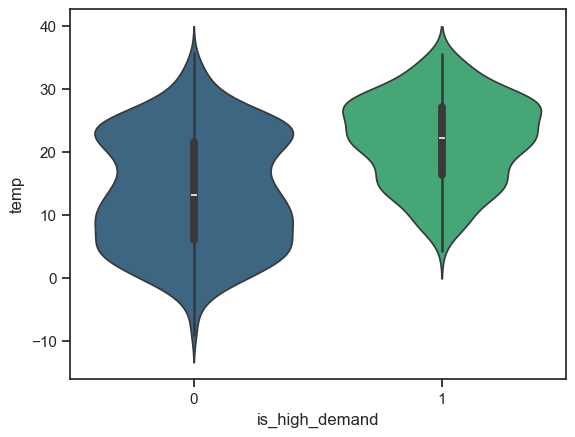

In [19]:
#visualize the distributions for across summertime (since it is binary)
data_violin = data[['is_high_demand','temp','humidity','hour_of_day','summertime','month', 'weekday']]
sns.violinplot(data=data_violin,x='is_high_demand',y='temp',palette='viridis')

# NOTE: 
distributions look bimodal in both high and low demand distrubtions try and find if a variable can seperate those distribtions

<Axes: xlabel='is_high_demand', ylabel='temp'>

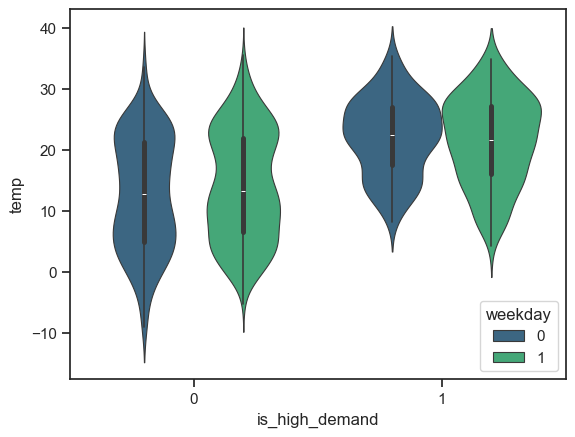

In [20]:
sns.violinplot(data=data_violin,x='is_high_demand',y='temp', hue='weekday', palette='viridis', linewidth=.8)

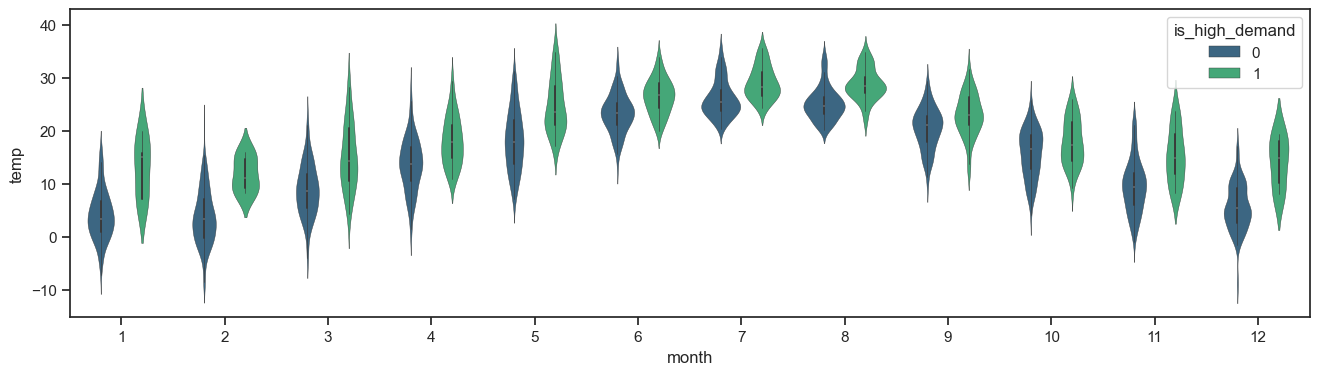

In [21]:
plt.figure(figsize=(16,4))
sns.violinplot(data=data_violin,x='month',y='temp', hue='is_high_demand', palette='viridis', linewidth=.3)
# plt.savefig('../figures/violin_month.png',format='png',bbox_inches='tight',transparent=True, dpi=720)
##still some bimodal looking dists but we can see that temp on month is a solid seperator of high and low demnd

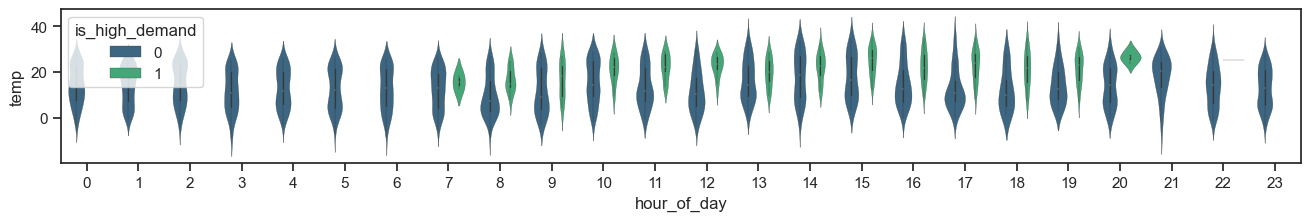

In [24]:
plt.figure(figsize=(16,2))
sns.violinplot(data=data_violin,x='hour_of_day',y='temp', hue='is_high_demand', palette='viridis', linewidth=.2)
# plt.savefig('../figures/violin_hour.png',format='png',bbox_inches='tight',transparent=True,dpi=720)
#there is never high demand from 23-6am

In [13]:
all_interaction_data = pd.read_csv('../data/all_interactions.csv')
corr_matrix_all = all_interaction_data.corr()
corr_all_with_demand = corr_matrix_all['is_high_demand'].sort_values(ascending=False)
corr_all_with_demand = corr_all_with_demand[abs(corr_all_with_demand) > .23]
corr_all_with_demand

is_high_demand                               1.000000
remainder__summertime remainder__rushhour    0.514969
remainder__summertime remainder__daytime     0.491689
remainder__rushhour^2                        0.482137
remainder__daytime remainder__rushhour       0.482137
remainder__rushhour                          0.482137
num__weather_score                           0.479621
num__weather_score remainder__daytime        0.479251
num__weather_score remainder__rushhour       0.472383
num__weather_score remainder__summertime     0.458502
remainder__daytime                           0.412841
remainder__daytime^2                         0.412841
num__temp remainder__rushhour                0.409683
num__temp remainder__daytime                 0.390719
remainder__weekday remainder__rushhour       0.367603
num__weather_score remainder__weekday        0.343671
num__temp                                    0.336981
num__weather_score^2                         0.307876
num__temp remainder__summert

['is_high_demand', 'remainder__summertime remainder__rushhour', 'remainder__summertime remainder__daytime', 'remainder__rushhour^2', 'remainder__daytime remainder__rushhour', 'remainder__rushhour', 'num__weather_score', 'num__weather_score remainder__daytime', 'num__weather_score remainder__rushhour', 'num__weather_score remainder__summertime', 'remainder__daytime', 'remainder__daytime^2', 'num__temp remainder__rushhour', 'num__temp remainder__daytime', 'remainder__weekday remainder__rushhour', 'num__weather_score remainder__weekday', 'num__temp', 'num__weather_score^2', 'num__temp remainder__summertime', 'cat__hour_of_day_18 remainder__summertime', 'cat__hour_of_day_18 remainder__daytime', 'cat__hour_of_day_18^2', 'cat__hour_of_day_18', 'cat__hour_of_day_18 remainder__rushhour', 'cat__day_of_week_5 remainder__daytime', 'cat__hour_of_day_17 remainder__summertime', 'num__weather_score cat__day_of_week_5', 'cat__month_9 remainder__rushhour', 'num__weather_score cat__hour_of_day_17', 'num

Text(0, 0.5, 'Weather Score')

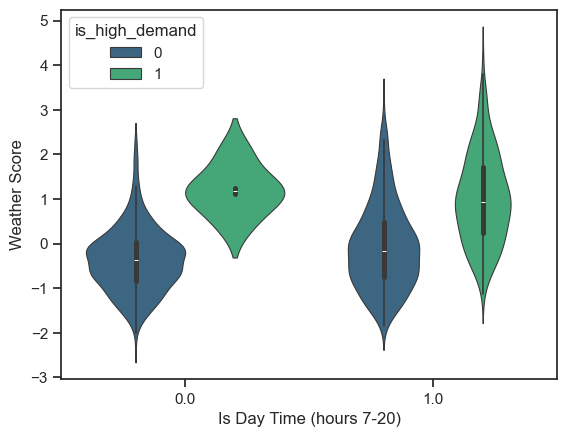

In [14]:
print(corr_all_with_demand.index.tolist())
data_weather = all_interaction_data[corr_all_with_demand.index.tolist()]
sns.violinplot(data=all_interaction_data,x='remainder__daytime',y='num__weather_score', hue='is_high_demand', palette='viridis', linewidth=.8)
plt.xlabel('Is Day Time (hours 7-20)')
plt.ylabel('Weather Score')
# plt.savefig('../figures/violin_weather_daytime.png', format='png', bbox_inches='tight', transparent=True,dpi=600)

In [17]:
all_interaction_data[['remainder__summertime remainder__rushhour','is_high_demand']].groupby('remainder__summertime remainder__rushhour')['is_high_demand'].value_counts(normalize=True).reset_index(name='proportion')

,remainder__summertime remainder__rushhour,is_high_demand,proportion
0,0.0,0,0.899202
1,0.0,1,0.100798
2,1.0,1,0.674208
3,1.0,0,0.325792


In [18]:
all_interaction_data[['remainder__daytime','is_high_demand']].groupby('remainder__daytime')['is_high_demand'].value_counts(normalize=True).reset_index(name='proportion')

,remainder__daytime,is_high_demand,proportion
0,0.0,0,0.993151
1,0.0,1,0.006849
2,1.0,0,0.674713
3,1.0,1,0.325287


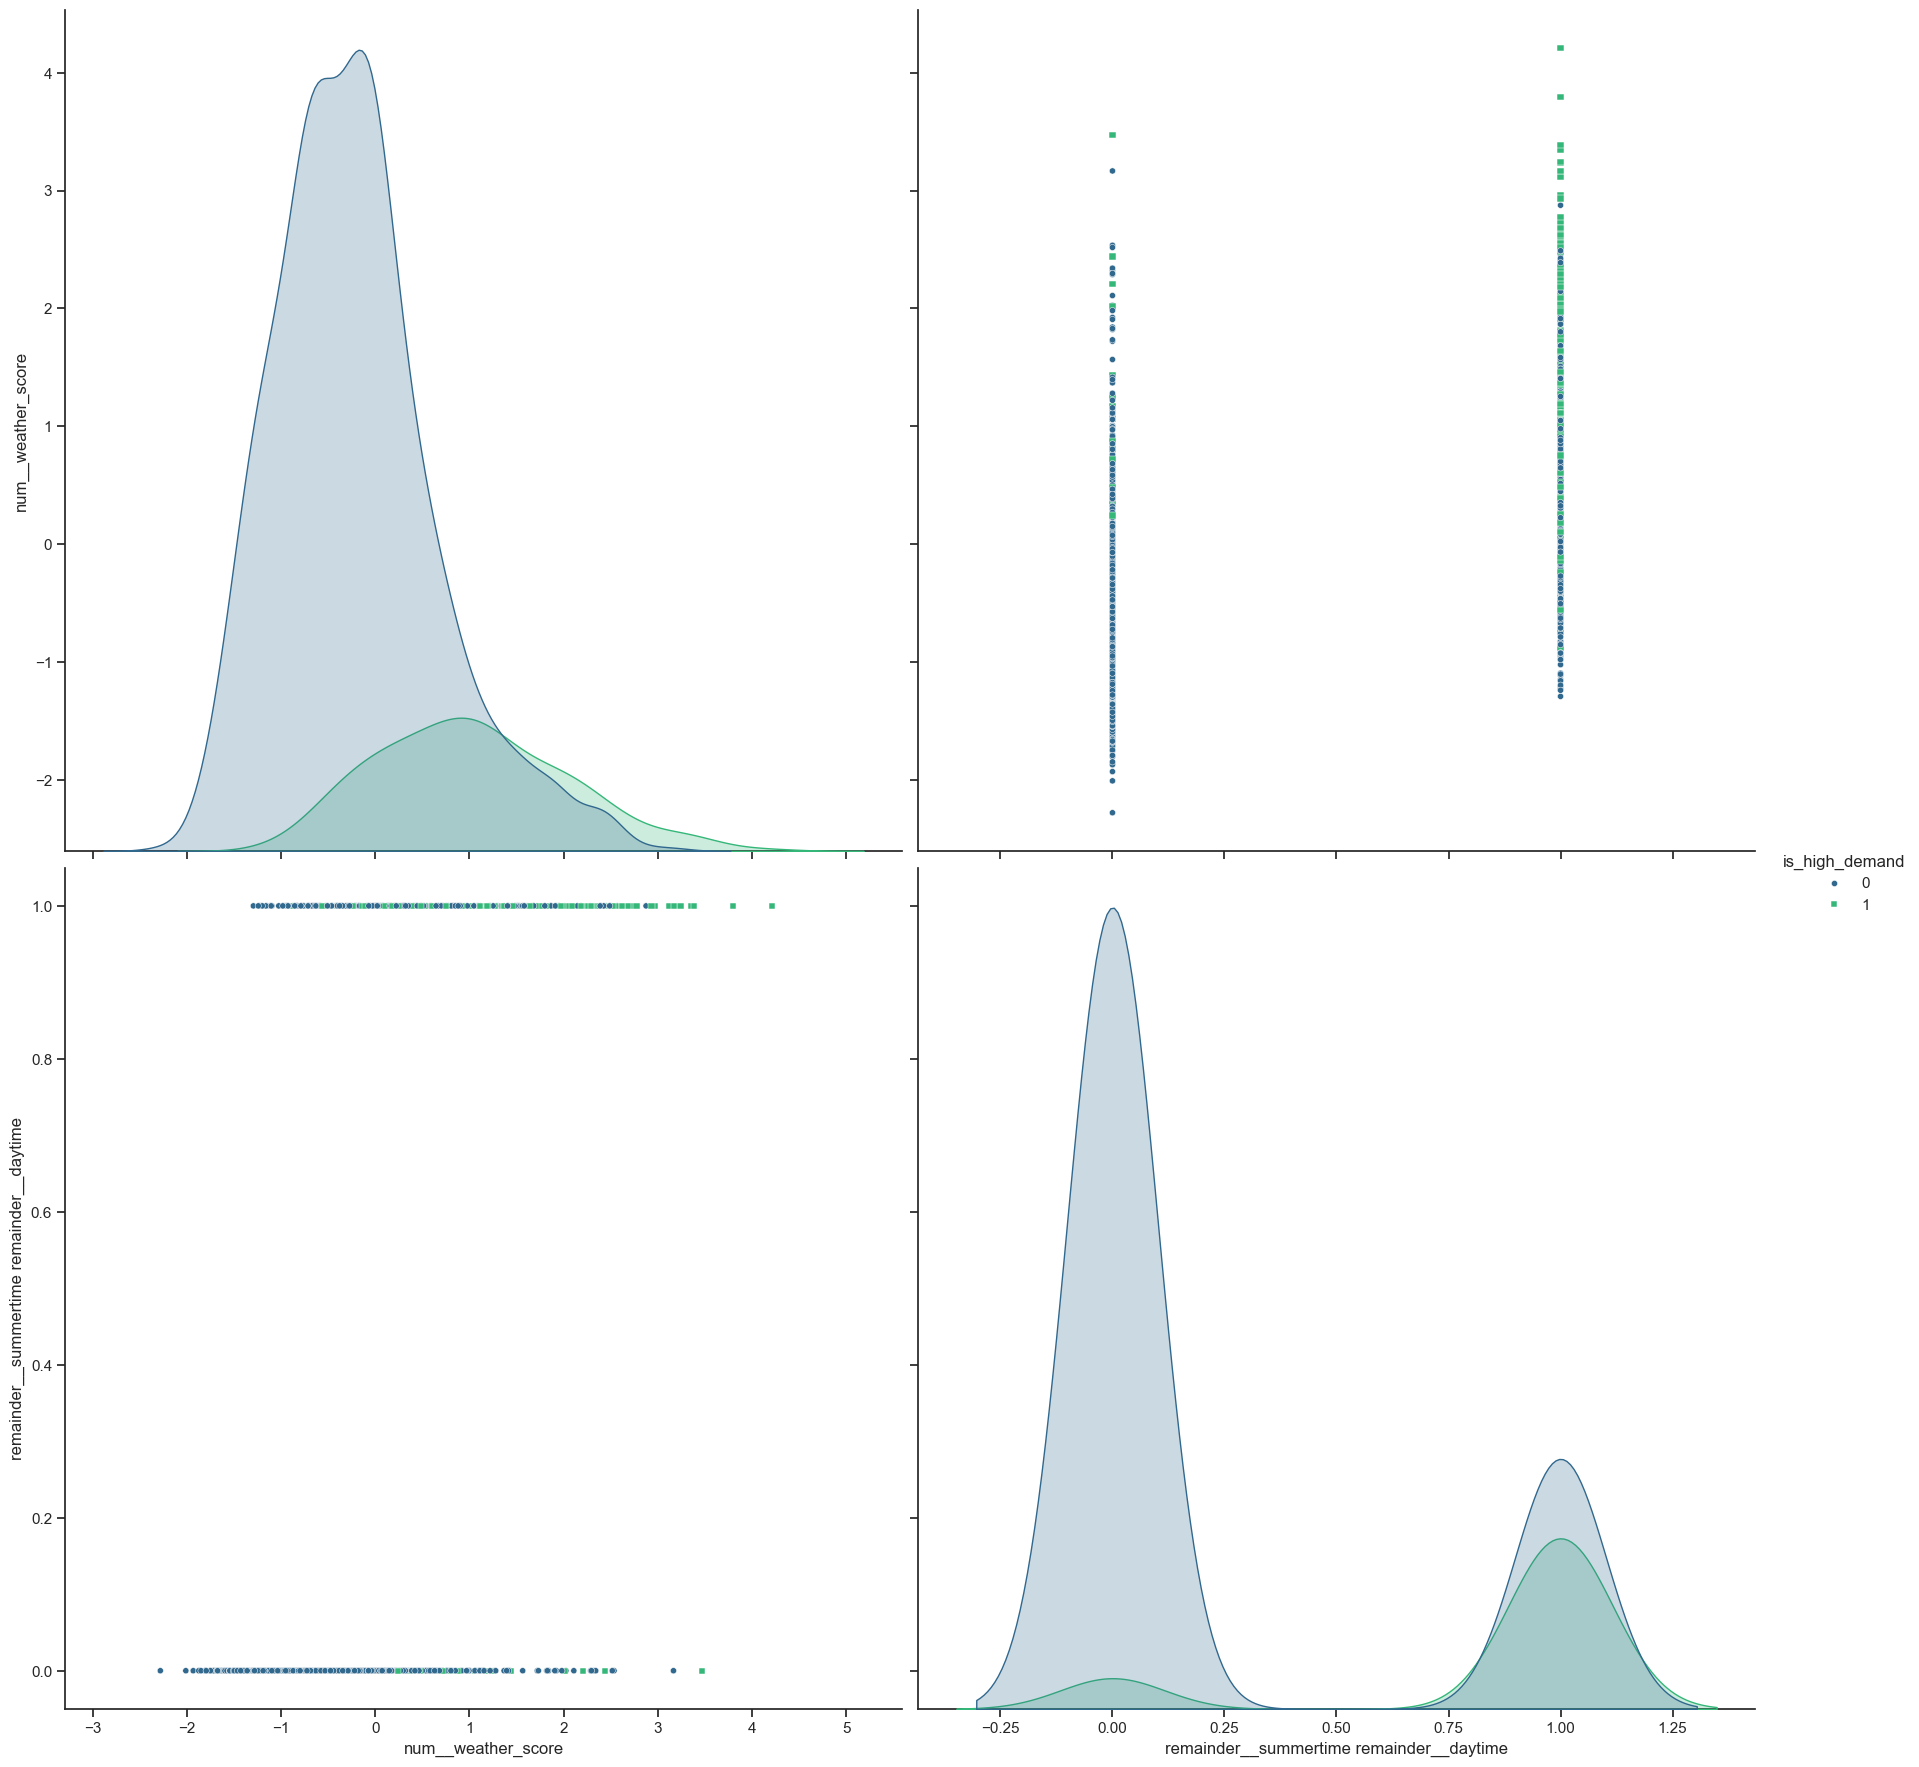

In [41]:
covs = ['num__humidity', 'remainder__summertime remainder__daytime','num__weather_score','num__windspeed', 'is_high_demand','num__temp remainder__daytime']
sns.pairplot(all_interaction_data[covs], vars=['num__weather_score','remainder__summertime remainder__daytime'],
             hue='is_high_demand',
             markers=["o", "s"],
             plot_kws={"s":20},
             palette='viridis',height=9)